<a href="https://colab.research.google.com/github/monrudee-li/monrudee-li/blob/main/Nanotoxicity_metaanalysis_classification_label_encoder_mergedDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This work we want to build the machine learning models to explore the nanotoxicity using the datasets from "Meta-Analysis of Nanoparticle Cytotoxicity via Data-Mining the Literature" published in ACS nano

In [1]:
from sklearn.datasets import load_boston

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import metrics
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns


In [2]:
#creating data table
#data=pd.read_csv("removedNaN_zetapotential.csv",encoding='cp1252')
#data=pd.read_csv("compared_DT4.csv",encoding='cp1252') #remove NaN from all the data --> this makes sense, for example, ไม่ได้ระบุ ไม่ได้หมายความว่าเคลือบด้วยสารเดียวกัน จึงควรนำข้อมูลที่เป็น NaN ออก
#data=pd.read_csv("DT4_removedNaN_zetapotential.csv",encoding='cp1252') 
#data=pd.read_csv("dataset_removedNaN_zetapotential_labelcoat_animal.csv",encoding='cp1252')
#data=pd.read_csv("dataset_removedNaN_zetapotential_labelcoat.csv",encoding='cp1252')
#data=pd.read_csv("removedAllNaN_539_8.csv",encoding='cp1252') #removed NaN data and use some columns according to the paper
#data=pd.read_csv("removedAllNaN_539_allcol.csv",encoding='cp1252')  #removed NaN data use all the columns
data=pd.read_csv("Merged_dataset_NoZetaPotential.csv",encoding='cp1252')
#data=pd.read_csv("Merged_dataset_NoZetaPotential_likeLabourta_NoBiochemical.csv",encoding='cp1252')
data

Material Type_Organic_Inorganic  \
0                   Cr                      I   
1                   Co                      I   
2                   Co                      I   
3                   Cr                      I   
4                   Ti                      I   
5                   Ti                      I   
6                   Cr                      I   
7                   Co                      I   
8                   Co                      I   
9                   Cr                      I   
10                  Ti                      I   
11                  Ti                      I   
12                  Co                      I   
13                  Cr                      I   
14                  Cr                      I   
15                  Co                      I   
16                  Ti                      I   
17                  Ti                      I   
18                  Co                      I   
19                  Cr                      I   
20                  Cr                      I   
21                  Co                      I   
22                  Ti                      I   
23                  Ti                      I   
24                  Co                      I   
25                  Cr                      I   
26                  Co                      I   
27                  Cr                      I   
28                  Ti                      I   
29                  Ti                      I   
30                  Co                      I   
31                  Co                      I   
32                  Co                      I   
33                  Co                      I   
34                  Cr                      I   
35                  Cr                      I   
36                  Cr                      I   
37                  Cr                      I   
38                  Ti                      I   
39                  Ti                      I   
40                  Ti                      I   
41                  Ti                      I   
42                  Co                      I   
43                  Co                      I   
44                  Cr                      I   
45                  Cr                      I   
46                  Ti                      I   
47                  Ti                      I   
48          Iron oxide                      I   
49          Iron oxide                      I   
50          Iron oxide                      I   
51          Iron oxide                      I   
52                 ZnO                      I   
53                 ZnO                      I   
54                 ZnO                      I   
55                 ZnO                      I   
56                 MgO                      I   
57                 MgO                      I   
58                 MgO                      I   
59                 MgO                      I   
60          Iron oxide                      I   
61          Iron oxide                      I   
62          Iron oxide                      I   
63          Iron oxide                      I   
64                 ZnO                      I   
65                 ZnO                      I   
66                 ZnO                      I   
67                 ZnO                      I   
68                 MgO                      I   
69                 MgO                      I   
70                 MgO                      I   
71                 MgO                      I   
72                 CuO                      I   
73                 CuO                      I   
74                 CuO                      I   
75                 CuO                      I   
76               Al2O3                      I   
77               Al2O3                      I   
78               Al2O3                      I   
79               Al2O3                      I   
80          Iron oxide                      I

In [3]:
data.shape

(5983, 16)

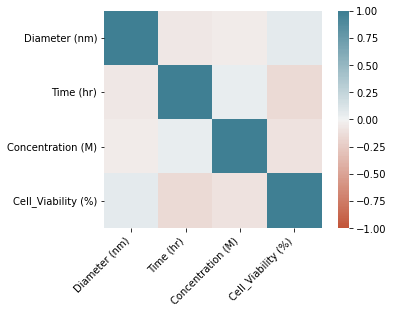

In [4]:
corr_matrix=data.corr()

ax = sns.heatmap(corr_matrix,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right');

#sns.heatmap(corr_matrix,annot=True)

In [5]:
data.isna().sum()

Material                  0
Type_Organic_Inorganic    0
Coat                      0
Diameter (nm)             0
Cells                     0
Human_Animal_Cells        0
Cell_Source               0
Cell_Tissue               0
Cell_Morphology           0
Cell_Age                  0
Cell Line_Primary Cell    0
Time (hr)                 0
Concentration (M)         0
Test                      0
Test_Indicator            0
Cell_Viability (%)        0
dtype: int64

In [6]:
#drop NaN values
#for i in range(total_sample):
 #   if np.isnan(data.Zeta_Potential[i]):
  #      data = data.drop([i])
   #     dropped_rows.append(str(i))
#Coat is string...cannot use this code to drop it
    #if np.isnan(data.Diameter[i]):
    #    data = data.drop([i])
    #    dropped_rows.append(str(i))
    #elif np.isnan(data.Concentration[i]):
    #    data = data.drop([i])
    #    dropped_rows.append(str(i))
    #elif np.isnan(data.Zeta_Potential[i]):
    #    data = data.drop([i])
    #    dropped_rows.append(str(i))
    #elif np.isnan(data.Exposure_time[i]):
    #    data = data.drop([i])
    #    dropped_rows.append(str(i))
    #elif np.isnan(data.Cell_viability[i]):
    #    data = data.drop([i])
    #    dropped_rows.append(str(i))
        
#data = data.drop(columns = ['Animal'])  #drop column "animal" but still we got Zeta Potential and Coat that still contain NaN
data = data.reset_index()
data = data.drop(columns = ['index'])

data.head()

Material Type_Organic_Inorganic  Coat  Diameter (nm)      Cells  \
0       Cr                      I  None           30.0  RAW 264.7   
1       Co                      I  None           30.0  RAW 264.7   
2       Co                      I  None           30.0  RAW 264.7   
3       Cr                      I  None           30.0  RAW 264.7   
4       Ti                      I  None           35.0  RAW 264.7   

  Human_Animal_Cells Cell_Source Cell_Tissue      Cell_Morphology Cell_Age  \
0                  A       Mouse       Blood  Monocyte/Macrophage    Adult   
1                  A       Mouse       Blood  Monocyte/Macrophage    Adult   
2                  A       Mouse       Blood  Monocyte/Macrophage    Adult   
3                  A       Mouse       Blood  Monocyte/Macrophage    Adult   
4                  A       Mouse       Blood  Monocyte/Macrophage    Adult   

  Cell Line_Primary Cell  Time (hr)  Concentration (M)       Test  \
0                      L         24       1.660000e-20  Live/Dead   
1                      L         24       1.660000e-20  Live/Dead   
2                      L         96       1.660000e-20  Live/Dead   
3                      L         96       1.660000e-20  Live/Dead   
4                      L         24       1.660000e-20  Live/Dead   

                     Test_Indicator  Cell_Viability (%)  
0  Calcein AM, Ethidium homodimer-1           76.292610  
1  Calcein AM, Ethidium homodimer-1           79.070404  
2  Calcein AM, Ethidium homodimer-1           88.746800  
3  Calcein AM, Ethidium homodimer-1           89.258310  
4  Calcein AM, Ethidium homodimer-1           85.551930

In [7]:
data.columns

Index(['Material', 'Type_Organic_Inorganic', 'Coat', 'Diameter (nm)', 'Cells',
       'Human_Animal_Cells', 'Cell_Source', 'Cell_Tissue', 'Cell_Morphology',
       'Cell_Age', 'Cell Line_Primary Cell', 'Time (hr)', 'Concentration (M)',
       'Test', 'Test_Indicator', 'Cell_Viability (%)'],
      dtype='object')

In [8]:
total_sample = len(data)
dropped_rows = []

In [9]:
#for i in range(total_sample):
 #   if np.isnan(data.Diameter[i]):
  #      data = data.drop([i])
   #     dropped_rows.append(str(i))
   # elif np.isnan(data.Concentration[i]):
   #     data = data.drop([i])
   #     dropped_rows.append(str(i))
   # elif np.isnan(data.Zeta_Potential[i]):
   #     data = data.drop([i])
   #     dropped_rows.append(str(i))
   # elif np.isnan(data.Exposure_time[i]):
   #     data = data.drop([i])
   #     dropped_rows.append(str(i))
   # elif np.isnan(data.Cell_viability[i]):
   #     data = data.drop([i])
    #    dropped_rows.append(str(i))
        
#data = data.drop(columns = ['Animal'])
#data = data.reset_index()
#data = data.drop(columns = ['index'])

#data

In [10]:
#Encoding non numeric data using label encoder

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Material']=labelencoder.fit_transform(data['Material'].astype('str'))
data['Type_Organic_Inorganic']=labelencoder.fit_transform(data['Type_Organic_Inorganic'].astype('str'))
data['Coat']=labelencoder.fit_transform(data['Coat'].astype('str'))
#data['Zeta_Potential']=labelencoder.fit_transform(data['Zeta_Potential'].astype('str'))
data['Cells']=labelencoder.fit_transform(data['Cells'].astype('str'))
data['Cell_Source']=labelencoder.fit_transform(data['Cell_Source'].astype('str'))
data['Human_Animal_Cells']=labelencoder.fit_transform(data['Human_Animal_Cells'].astype('str'))
data['Cell_Tissue']=labelencoder.fit_transform(data['Cell_Tissue'].astype('str'))
data['Cell_Morphology']=labelencoder.fit_transform(data['Cell_Morphology'].astype('str'))
data['Cell_Age']=labelencoder.fit_transform(data['Cell_Age'].astype('str'))
data['Cell Line_Primary Cell']=labelencoder.fit_transform(data['Cell Line_Primary Cell'].astype('str'))
data['Test']=labelencoder.fit_transform(data['Test'].astype('str'))
data['Test_Indicator']=labelencoder.fit_transform(data['Test_Indicator'].astype('str'))
#data['Tissue_Source']=labelencoder.fit_transform(data['Tissue_Source'].astype('str'))
#data['Biochemical_metric']=labelencoder.fit_transform(data['Biochemical_metric'].astype('str'))
#data['Colloidal_stability_checked']=labelencoder.fit_transform(data['Colloidal_stability_checked'].astype('str'))
#data['Positive_Control']=labelencoder.fit_transform(data['Positive_Control'].astype('str'))

data.head(10)

Material  Type_Organic_Inorganic  Coat  Diameter (nm)  Cells  \
0        14                       1    29           30.0    103   
1        12                       1    29           30.0    103   
2        12                       1    29           30.0    103   
3        14                       1    29           30.0    103   
4        43                       1    29           35.0    103   
5        43                       1    29           35.0    103   
6        14                       1    29           30.0    103   
7        12                       1    29           30.0    103   
8        12                       1    29           30.0    103   
9        14                       1    29           30.0    103   

   Human_Animal_Cells  Cell_Source  Cell_Tissue  Cell_Morphology  Cell_Age  \
0                   0            8            6               12         0   
1                   0            8            6               12         0   
2                   0            8            6               12         0   
3                   0            8            6               12         0   
4                   0            8            6               12         0   
5                   0            8            6               12         0   
6                   0            8            6               12         0   
7                   0            8            6               12         0   
8                   0            8            6               12         0   
9                   0            8            6               12         0   

   Cell Line_Primary Cell  Time (hr)  Concentration (M)  Test  Test_Indicator  \
0                       0         24       1.660000e-20    17               3   
1                       0         24       1.660000e-20    17               3   
2                       0         96       1.660000e-20    17               3   
3                       0         96       1.660000e-20    17               3   
4                       0         24       1.660000e-20    17               3   
5                       0         96       1.660000e-20    17               3   
6                       0         24       1.660000e-19    17               3   
7                       0         24       1.660000e-19    17               3   
8                       0         96       1.660000e-19    17               3   
9                       0         96       1.660000e-19    17               3   

   Cell_Viability (%)  
0           76.292610  
1           79.070404  
2           88.746800  
3           89.258310  
4           85.551930  
5           91.815860  
6           68.615090  
7           71.392880  
8           81.841430  
9           83.631714

In [11]:
#assign high-low to Cell_Viability

data.loc[data['Cell_Viability (%)'] < 50, 'Cell_Viability (%)'] = 0
data.loc[data['Cell_Viability (%)'] >= 50, 'Cell_Viability (%)'] = 1

data.head()

Material  Type_Organic_Inorganic  Coat  Diameter (nm)  Cells  \
0        14                       1    29           30.0    103   
1        12                       1    29           30.0    103   
2        12                       1    29           30.0    103   
3        14                       1    29           30.0    103   
4        43                       1    29           35.0    103   

   Human_Animal_Cells  Cell_Source  Cell_Tissue  Cell_Morphology  Cell_Age  \
0                   0            8            6               12         0   
1                   0            8            6               12         0   
2                   0            8            6               12         0   
3                   0            8            6               12         0   
4                   0            8            6               12         0   

   Cell Line_Primary Cell  Time (hr)  Concentration (M)  Test  Test_Indicator  \
0                       0         24       1.660000e-20    17               3   
1                       0         24       1.660000e-20    17               3   
2                       0         96       1.660000e-20    17               3   
3                       0         96       1.660000e-20    17               3   
4                       0         24       1.660000e-20    17               3   

   Cell_Viability (%)  
0                 1.0  
1                 1.0  
2                 1.0  
3                 1.0  
4                 1.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d1cadcc10>,
      dtype=object)

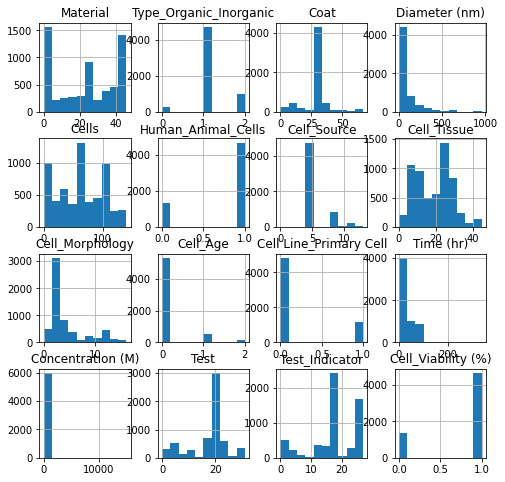

In [12]:
data.hist(figsize=(8,8))

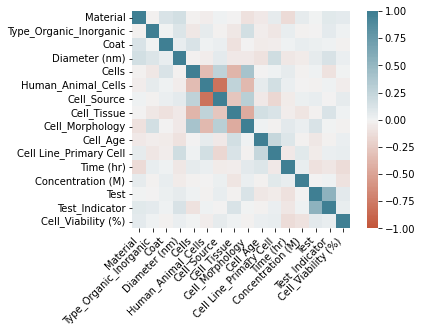

In [13]:
corr_matrix=data.corr()

ax = sns.heatmap(corr_matrix,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right');

#sns.heatmap(corr_matrix,annot=True)

In [14]:

#X = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20]].values
X = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]].values
#X = data.iloc[:,[2,3,4,5,6,11,12,14,15]].values #tree feature importance
#X = data.iloc[:,[4,12]].values #tree feature importance
#X = data.iloc[:,[0,1,2,3,4,5]].values
Y = data.iloc[:,15].values

X



array([[1.40e+01, 1.00e+00, 2.90e+01, ..., 1.66e-20, 1.70e+01, 3.00e+00],
       [1.20e+01, 1.00e+00, 2.90e+01, ..., 1.66e-20, 1.70e+01, 3.00e+00],
       [1.20e+01, 1.00e+00, 2.90e+01, ..., 1.66e-20, 1.70e+01, 3.00e+00],
       ...,
       [2.60e+01, 1.00e+00, 6.10e+01, ..., 1.50e+04, 1.70e+01, 3.00e+00],
       [2.60e+01, 1.00e+00, 6.10e+01, ..., 1.50e+04, 1.70e+01, 3.00e+00],
       [2.60e+01, 1.00e+00, 6.10e+01, ..., 1.50e+04, 1.70e+01, 3.00e+00]])

In [15]:
Y.shape
Y

array([1., 1., 1., ..., 0., 0., 0.])

In [16]:
#normalize the data
mean = X.mean(axis = 0)
X -= mean
std = X.std(axis = 0)
X /= std
X.shape

(5983, 15)

In [17]:
#Import decision tree classification model and cross validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict, cross_validate
from sklearn.metrics import accuracy_score

In [18]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#X_train, X_holdout, y_train, y_holdout = train_test_split(X, Y, test_size=0.3, random_state=17)
#y_train.shape

In [19]:
#Extract a holdout set at the very begining
X_train, X_holdout, y_train, y_holdout = train_test_split(X, Y, test_size=0.3, random_state = 17)
 

In [20]:
#CV to find the best parameters
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model, tree, ensemble
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.model_selection import GridSearchCV, cross_val_score
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
tree_params = {"max_depth": range(1, 11), "max_features": range(4, 19)}
tree_grid = GridSearchCV(tree, tree_params, cv=10, n_jobs=-1, verbose=True)
tree_grid.fit(X_train, y_train)



Fitting 10 folds for each of 150 candidates, totalling 1500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             verbose=True)

In [21]:
tree_grid.best_params_

{'max_depth': 10, 'max_features': 8}

In [22]:
tree_grid.best_score_

0.85100489888205

In [23]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout)) 

0.849025069637883

In [24]:

dt = DecisionTreeClassifier(criterion='gini', max_depth = 10, \
                        min_samples_leaf = 0.10, random_state = 42)
 
scores = cross_val_score(dt, X_train, y_train, cv = 10)
print("\n" + ("*" * 100))
print("The cross-validation scores using cross_val_score method are \n{0}".format(scores))
print("*" * 100)
 
import numpy as np
print("\n" + ("*" * 100))
print("Mean of k-fold scores using cross_val_score method is {0}".format(np.mean(scores)))
print("*" * 100)
print("\n")


****************************************************************************************************
The cross-validation scores using cross_val_score method are 
[0.77326969 0.77326969 0.77326969 0.77326969 0.77326969 0.77326969
 0.77088305 0.77088305 0.77272727 0.77272727]
****************************************************************************************************

****************************************************************************************************
Mean of k-fold scores using cross_val_score method is 0.7726838793664569
****************************************************************************************************




In [25]:
knn = KNeighborsClassifier(n_neighbors=10)

# for kNN, we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [26]:
knn_pred = knn.predict(X_holdout_scaled)
accuracy_score(y_holdout, knn_pred)

0.8328690807799443

In [27]:
from sklearn.pipeline import Pipeline

knn_pipe = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))])

knn_params = {"knn__n_neighbors": range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=10, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 10 folds for each of 9 candidates, totalling 90 fits


({'knn__n_neighbors': 1}, 0.8796622169439654)

In [28]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout))

0.886908077994429

In [29]:
knn = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(knn, X_train, y_train, cv = 10)
print("\n" + ("*" * 100))
print("The cross-validation scores using cross_val_score method are \n{0}".format(scores))
print("*" * 100)
 
import numpy as np
print("\n" + ("*" * 100))
print("Mean of k-fold scores using cross_val_score method is {0}".format(np.mean(scores)))
print("*" * 100)
print("\n")


****************************************************************************************************
The cross-validation scores using cross_val_score method are 
[0.85441527 0.83054893 0.82338902 0.81861575 0.8424821  0.82338902
 0.7947494  0.84486874 0.83971292 0.81818182]
****************************************************************************************************

****************************************************************************************************
Mean of k-fold scores using cross_val_score method is 0.829035297073232
****************************************************************************************************




In [30]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=10))) 

0.8942206894976648


In [31]:
forest_params = {"max_depth": range(6, 12), "max_features": range(4, 19)}
forest_grid = GridSearchCV(forest, forest_params, cv=10, n_jobs=-1, verbose=True)
forest_grid.fit(X_train, y_train)
forest_grid.best_params_, forest_grid.best_score_ 

Fitting 10 folds for each of 90 candidates, totalling 900 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1056, in __call__
    self.retrieve()
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 935,

({'max_depth': 11, 'max_features': 13}, 0.8884870562172409)

In [32]:
accuracy_score(y_holdout, forest_grid.predict(X_holdout))

0.9008356545961003

In [33]:
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
scores = cross_val_score(knn, X_train, y_train, cv = 10)
print("\n" + ("*" * 100))
print("The cross-validation scores using cross_val_score method are \n{0}".format(scores))
print("*" * 100)
 
import numpy as np
print("\n" + ("*" * 100))
print("Mean of k-fold scores using cross_val_score method is {0}".format(np.mean(scores)))
print("*" * 100)
print("\n")


****************************************************************************************************
The cross-validation scores using cross_val_score method are 
[0.85441527 0.83054893 0.82338902 0.81861575 0.8424821  0.82338902
 0.7947494  0.84486874 0.83971292 0.81818182]
****************************************************************************************************

****************************************************************************************************
Mean of k-fold scores using cross_val_score method is 0.829035297073232
****************************************************************************************************




In [34]:
from sklearn.svm import SVC
svm = SVC(gamma='auto')
#svm=SVC()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
svm.fit(X_train_scaled, y_train)

SVC(gamma='auto')

In [35]:
svm_pred = svm.predict(X_holdout_scaled)
accuracy_score(y_holdout, svm_pred)

0.8323119777158774

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
svm_grid = GridSearchCV(SVC(), param_grid=param_grid, cv=10)
svm_grid.fit(X_train, y_train)


svm_grid.fit(X_train, y_train)

svm_grid.best_params_, svm_grid.best_score_

In [ ]:
accuracy_score(y_holdout, svm_grid.predict(X_holdout))

In [ ]:
svm = SVC(gamma='auto')
scores = cross_val_score(svm, X_train, y_train, cv = 10)
print("\n" + ("*" * 100))
print("The cross-validation scores using cross_val_score method are \n{0}".format(scores))
print("*" * 100)
 
import numpy as np
print("\n" + ("*" * 100))
print("Mean of k-fold scores using cross_val_score method is {0}".format(np.mean(scores)))
print("*" * 100)
print("\n")

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
print(np.mean(cross_val_score(xgb, X_train, y_train, cv=10)))

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
learning_rate=0.04
xgb_params = {"n_estimators": range(500,1500,500)}
xgb_grid = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1, verbose=True)
xgb_grid.fit(X_train, y_train)
xgb_grid.best_params_, xgb_grid.best_score_ 

In [ ]:
accuracy_score(y_holdout, xgb_grid.predict(X_holdout))

In [ ]:
xgb = XGBClassifier(n_estimators=500, learning_rate=0.05)
scores = cross_val_score(xgb, X_train, y_train, cv = 10)
print("\n" + ("*" * 100))
print("The cross-validation scores using cross_val_score method are \n{0}".format(scores))
print("*" * 100)
 
import numpy as np
print("\n" + ("*" * 100))
print("Mean of k-fold scores using cross_val_score method is {0}".format(np.mean(scores)))
print("*" * 100)
print("\n")

In [ ]:
from sklearn.neural_network import MLPClassifier

alpha=[1e-5,2e-5,3e-5,4e-5]

for count in alpha:
    nn=MLPClassifier(solver='adam', alpha=count, hidden_layer_sizes=(150, 10), random_state=1)
    print(f'Learning rate: {count}')
    print(np.mean(cross_val_score(nn, X_train, y_train, cv=10)))
    print("The cross-validation scores using cross_val_score method are \n{0}".format(scores))
    print("*" * 100)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [ ]:
# Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
accuracy_lst =[]

def model_assess(model, name='Default'):
    model.fit(X_train, Y_train)
    prds = model.predict(X_test)
    model_acc = accuracy_score(Y_test, prds)
    accuracy_lst.append(100*model_acc)
    print('---', name, '---', '\n',
          confusion_matrix(Y_test, prds), '\n',
          'Accuracy:', (accuracy_score(Y_test, prds)), '\n',
          'Classification Report:', (classification_report(Y_test, prds)))
    
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, prds)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
    display.plot()
    plt.show()

In [ ]:
# Logistic Regression
lg = LogisticRegression()
model_assess(lg, 'Logistic Regression')

# Decision Tree
tree = DecisionTreeClassifier()
model_assess(tree, 'Decission Trees')

# Random Forest
rforest = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0)
model_assess(rforest, 'Random Forest')

# SVM
svm = SVC()
model_assess(svm, 'SVM')

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, name='KNN')

# XGBOOST
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, 'XGBoost')

# Neural Network
nn = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1)
model_assess(nn, 'Neural Nets')

In [ ]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

tree.feature_importances_

In [ ]:
data.columns

In [ ]:
# predict probabilities
pred_prob1 = lg.predict_proba(X_test)
pred_prob2 = tree.predict_proba(X_test)
pred_prob3 = rforest.predict_proba(X_test)
#pred_prob4 = svm.predict_proba(X_test)
pred_prob5 = knn.predict_proba(X_test)
pred_prob6 = xgb.predict_proba(X_test)
pred_prob7 = nn.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(Y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(Y_test, pred_prob3[:,1], pos_label=1)
#fpr4, tpr4, thresh4 = roc_curve(Y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(Y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(Y_test, pred_prob6[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(Y_test, pred_prob7[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

In [ ]:

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(Y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(Y_test, pred_prob3[:,1])
#auc_score4 = roc_auc_score(Y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(Y_test, pred_prob5[:,1])
auc_score6 = roc_auc_score(Y_test, pred_prob6[:,1])
auc_score7 = roc_auc_score(Y_test, pred_prob7[:,1])

#print(auc_score1, auc_score2, auc_score3, auc_score5, auc_score6, auc_score7)
print(auc_score2, auc_score3, auc_score5, auc_score6, auc_score7)

In [ ]:

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Decision tree')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Random Forest')
#plt.plot(fpr4, tpr4, linestyle='--',color='orange', label='SVM')
plt.plot(fpr5, tpr5, linestyle='--',color='black', label='KNN')
plt.plot(fpr6, tpr6, linestyle='--',color='red', label='XGBoost')
plt.plot(fpr7, tpr7, linestyle='--',color='pink', label='Neural Networks')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
!pip install shap
import matplotlib
import matplotlib.pyplot as plt
import shap


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
def model_assess(model, name='Default'):
    model.fit(X_train, y_train)

In [ ]:
#Decision Tree
tree = DecisionTreeClassifier(max_depth=10, max_features=16)
model_assess(tree, 'Decission Trees')

# Random Forest
rforest = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, random_state=17)
model_assess(rforest, 'Random Forest')


# XGBOOST
xgb = XGBClassifier(n_estimators=500)
model_assess( xgb, 'XGBoost')


In [ ]:
explainer = shap.TreeExplainer(tree)  #decision tree
shap_values = explainer.shap_values(X)
feature_names=list(data.columns.values.tolist())
ax1 = shap.summary_plot(shap_values, X, plot_type="bar",feature_names=list(data.columns.values.tolist()))
ax2 = shap.summary_plot(shap_values, X, feature_names=list(data.columns.values.tolist()))
#ax3= shap.dependence_plot(0, shap_values, X)

In [ ]:
explainer = shap.TreeExplainer(rforest)  #random forest
shap_values = explainer.shap_values(X)
feature_names=list(data.columns.values.tolist())
ax1 = shap.summary_plot(shap_values, X, plot_type="bar",feature_names=list(data.columns.values.tolist()))
ax2 = shap.summary_plot(shap_values, X, feature_names=list(data.columns.values.tolist()))
#ax3= shap.dependence_plot(0, shap_values, X)

In [ ]:
explainer = shap.TreeExplainer(xgb)  #XGBoost model
shap_values = explainer.shap_values(X)
feature_names=list(data.columns.values.tolist())
ax1 = shap.summary_plot(shap_values, X, plot_type="bar",feature_names=list(data.columns.values.tolist()))
ax2 = shap.summary_plot(shap_values, X, feature_names=list(data.columns.values.tolist()))
ax3= shap.dependence_plot(0, shap_values, X)

ANN model using Keras_tensorflow


In [ ]:
# split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [ ]:
# multilayer perceptron model 
# define model
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from matplotlib import pyplot
def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1))
    #model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
X_train.shape[1]
X_train

In [ ]:
# Build the Keras model (already compiled)
model = build_model()
    # Train the model (in silent mode, verbose=0)
#print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# fit model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=300, verbose=0)

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

#K-fold cross validation
from sklearn.model_selection import KFold
from numpy.random import seed
seed(2)
n_split=2

for train_index,valid_index in KFold(n_split).split(X):
    x_train,x_valid=X[train_index],X[valid_index]
    y_train,y_valid=Y[train_index],Y[valid_index]
    model=build_model()
    model_train=model.fit(x_train, y_train,epochs=100,
                         validation_data=(x_valid,y_valid))  
# predict probabilities for test set
    yhat_probs = model.predict(x_valid, verbose=0)
# predict crisp classes for test set
    #yhat_classes = model.predict_classes(x_valid, verbose=0)
    yhat_classes = (model.predict(x_valid) > 0.5).astype("int32")
# reduce to 1d array
    yhat_probs = yhat_probs[:, 0]
    yhat_classes = yhat_classes[:, 0]
# accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_valid, yhat_classes)
    print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
    precision = precision_score(y_valid, yhat_classes)
    print('Precision: %f' % precision)
# recall: tp / (tp + fn)
    recall = recall_score(y_valid, yhat_classes)
    print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_valid, yhat_classes)
    print('F1 score: %f' % f1)
# kappa
    kappa = cohen_kappa_score(y_valid, yhat_classes)
    print('Cohens kappa: %f' % kappa)
# ROC AUC
    auc = roc_auc_score(y_valid, yhat_probs)
    print('ROC AUC: %f' % auc)
# confusion matrix
    matrix = confusion_matrix(y_valid, yhat_classes)
    print(matrix)




In [ ]:
prediction = model.predict(X_test)

prediction[:10]

In [ ]:
Y[:10]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
my_accuracy = accuracy_score(Y_test, prediction.round())

my_accuracy

In [ ]:
#base line accuracy = ratio of larger set/total data points
#total % of high viability cells from reduced dataset(1261)

base_line_acc = (Y.sum()/len(Y))

base_line_acc